In [1]:
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns # to visualise

In [2]:
# Load dataset
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
Sales_and_Profit_Segement = data.groupby("Segment").sum().loc[:, ['Sales', 'Profit']]
Sales_and_Profit_Segement = round(Sales_and_Profit_Segement,2)
Sales_and_Profit_Segement

,Sales,Profit
Segment,,
Consumer,1161401.34,134119.21
Corporate,706146.37,91979.13
Home Office,429653.15,60298.68


In [6]:
Sales_and_Profit_Region =  data.groupby("Region").sum().loc[:, ['Sales', 'Profit']]
Sales_and_Profit_Region = round(Sales_and_Profit_Region,2)
Sales_and_Profit_Region

,Sales,Profit
Region,,
Central,501239.89,39706.36
East,678781.24,91522.78
South,391721.91,46749.43
West,725457.82,108418.45


In [7]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [8]:
#number of products in each sub-category
data['Sub-Category'].value_counts()


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

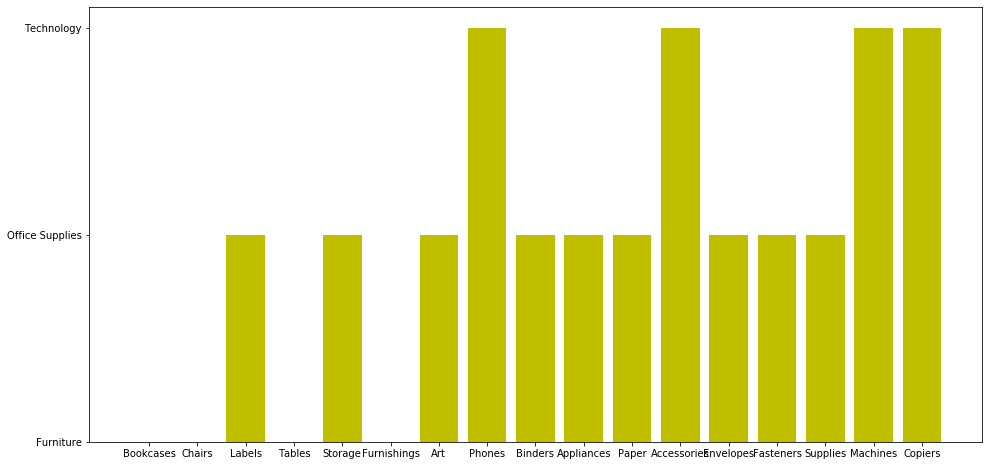

In [9]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=data,color='y')
plt.show()

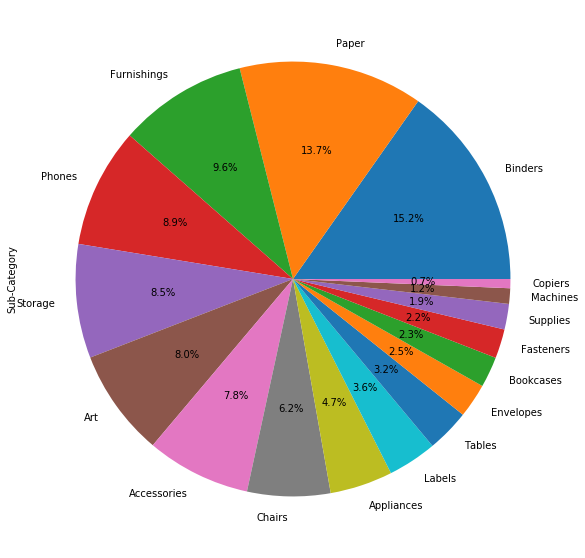

In [10]:
plt.figure(figsize=(12,10))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

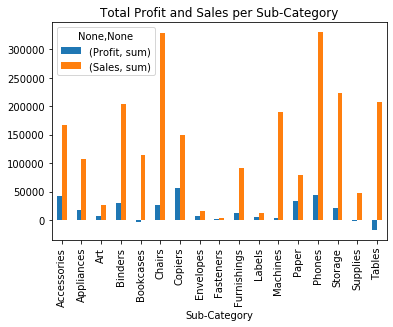

In [11]:
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()

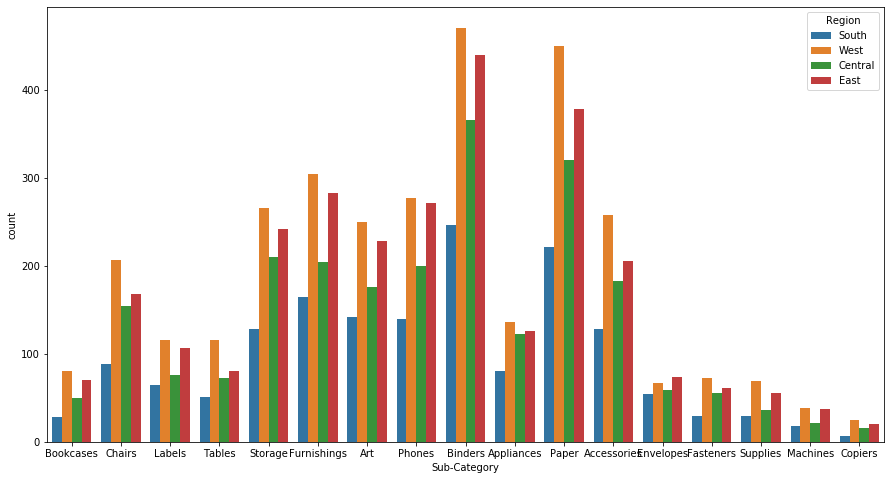

In [12]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=data)
plt.show()

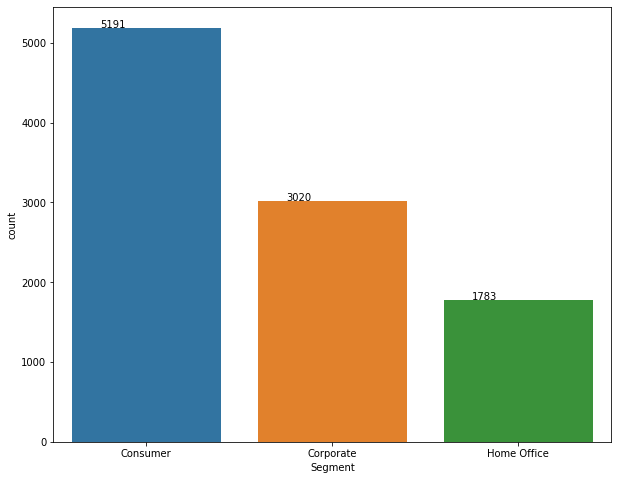

In [13]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = data)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

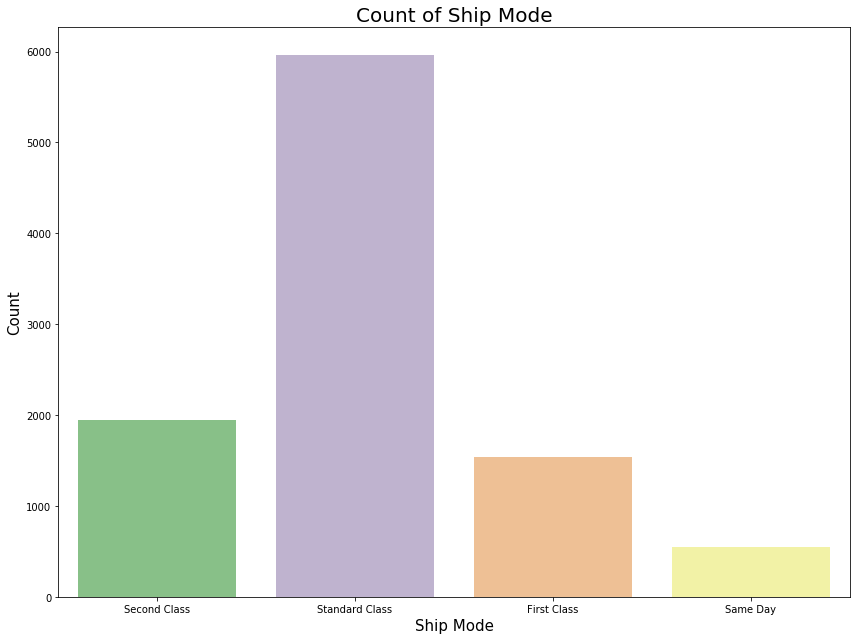

In [15]:
plt.figure(figsize=(12,9))

sns.countplot(x='Ship Mode', data=data, palette='Accent')
plt.title("Count of Ship Mode", fontsize=20)
plt.xlabel("Ship Mode", fontsize=15)
plt.ylabel("Count", fontsize=15)

plt.tight_layout()

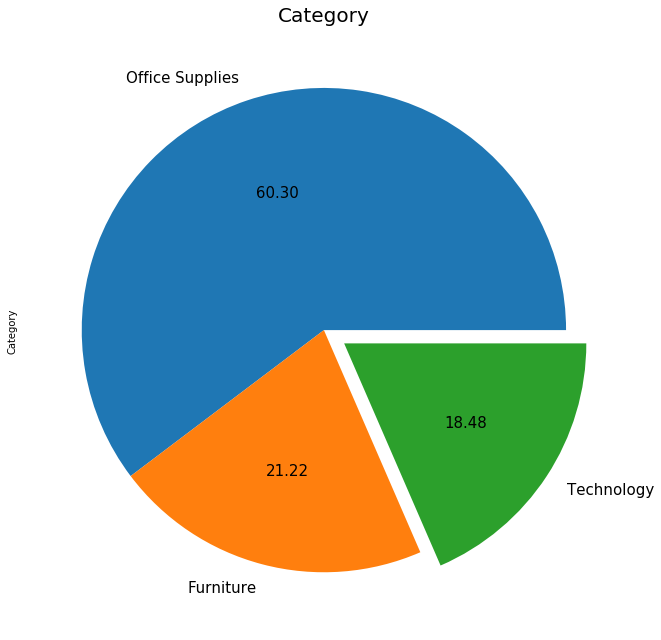

In [16]:
plt.figure(figsize=(11, 9))

explode = ( 0, 0, 0.1)
textprops = {"fontsize":15}
data['Category'].value_counts().plot.pie(autopct='%.2f', explode= explode, textprops =textprops)
plt.title("Category", fontsize=20)

plt.tight_layout()

In [18]:
Top_10_Sales_State = data.groupby("State").Sales.sum().nlargest(n =10)
print(Top_10_Sales_State)

print('\n')
print('*%*'*50)
print('\n')

Top_10_Profits_State = data.groupby("State").Profit.sum().nlargest(n =10)
print(Top_10_Profits_State)

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64


*%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%**%*


State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


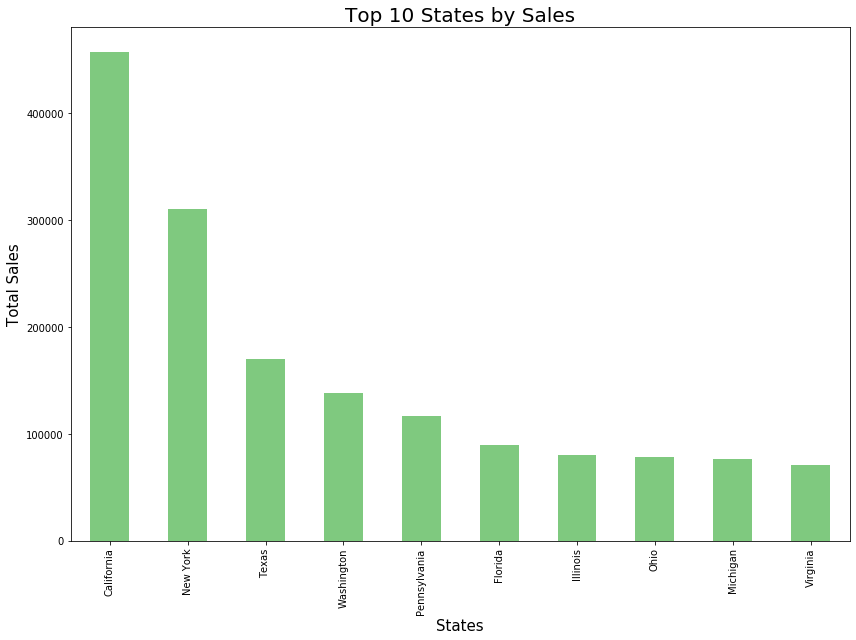

In [19]:
plt.figure(figsize=(12,9))

Top_10_Sales_State.plot(kind ='bar', colormap='Accent')
plt.title("Top 10 States by Sales",fontsize =20)
plt.xlabel("States", fontsize =15)
plt.ylabel("Total Sales",fontsize =15)

plt.tight_layout()

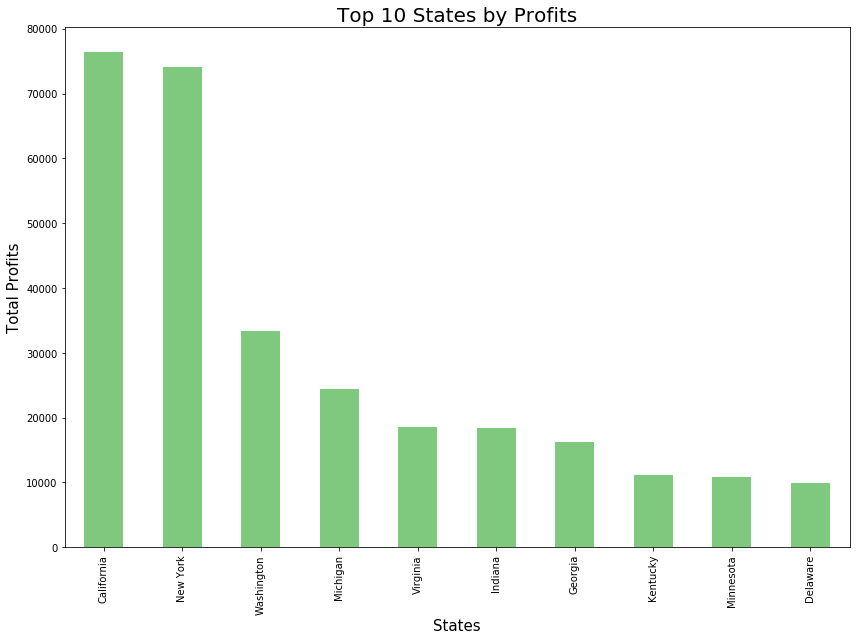

In [20]:
plt.figure(figsize=(12,9))

Top_10_Profits_State.plot(kind ='bar', colormap='Accent')
plt.title("Top 10 States by Profits",fontsize =20)
plt.xlabel("States", fontsize =15)
plt.ylabel("Total Profits",fontsize =15)

plt.tight_layout()